Install the libraries 

In [76]:
%pip install numpy
%pip install matplotlib
%pip install imageio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

Create the matrix with the points of the figure, in this case a simple square

In [2]:
square = np.array([
    [-1, -1],
    [ 1, -1],
    [ 1,  1],
    [-1,  1],
    [-1, -1]
])

Change to homogeneus coordinates

In [3]:
ones = np.ones((square.shape[0], 1))
square_h = np.hstack([square, ones])

In [4]:
print(square_h)

[[-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  1.]
 [-1.  1.  1.]
 [-1. -1.  1.]]


Plot the figure without tranformations

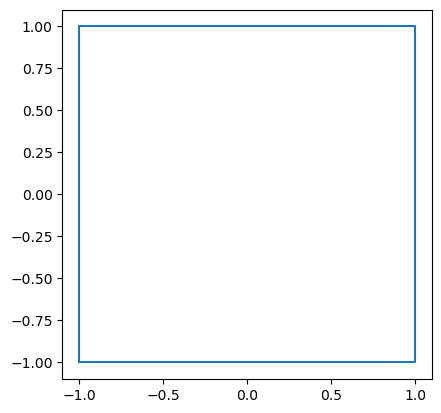

In [5]:
plt.plot(square_h[:,0], square_h[:,1])
plt.gca().set_aspect('equal') # Set units of axis X and Y equals
plt.show()

We will use functions in order to create the tranformations matrix and be able to modify the parameters of the transformations

translation function

In [6]:
def trans_matrix(tx,ty):
    translation = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return translation

Rotation function

In [7]:
def rot_matrix(angle):
    theta = np.deg2rad(angle)
    rotate = np.array([
        [np.cos(theta), -np.sin(theta),0],
        [np.sin(theta),  np.cos(theta),0],
        [0            ,  0            ,1]
    ])
    return rotate

Escalation function

In [8]:
def scl_matrix(sx,sy):
    scale = np.array([
        [sx, 0  ,0], # Escalation X
        [0, sy,0], # Escalation Y
        [0, 0  ,1] 
    ])
    return scale

Creation of the trasnformation matrix

In [9]:
scl_m = scl_matrix(2,3) # Escalate X by 2 and Y by 3
rot_m = rot_matrix(120) # Rotate by 45 degrees
tras_m = trans_matrix(20,20) # Translate 2 in X and -1 in Y

Using matrix multiplication in order to create the total transformation matrix

In [10]:
matrix_transformation = scl_m @ rot_m @ tras_m

Apply the tranformation using matrix multiplication

In [11]:
new_square = square_h @ matrix_transformation

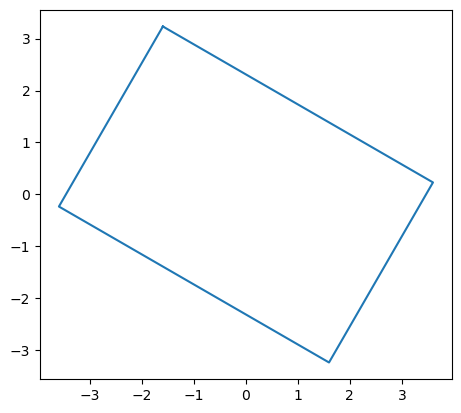

In [12]:
plt.plot(new_square[:,0], new_square[:,1])
plt.gca().set_aspect('equal') # Set units of axis X and Y equals
plt.show()

Loop for animation and transformations in function of frame

In [25]:

# Initial values
limit_frames = 50 #Limit of frames
frame = 0 # Frame counter
square_h = np.hstack([square, ones]) #Initial square
frames = [] # List to save the frames of the GIF

while frame <= limit_frames:

    #Create the parameters of the transformations in function of the frame
    t = frame * 0.8
    angle = t
    sx = 1 + 0.3*np.sin(t)
    tx = 2*np.cos(t)
    ty = 2*np.sin(t)

    # Create Matrix transformations escalation, rotation and translation
    scl_m = scl_matrix(sx,sx) # Escalate 
    rot_m = rot_matrix(angle) # Rotate 
    tras_m = trans_matrix(tx,ty) # Translate

    # Create the total trasnformation matriz
    matrix_transformation = scl_m @ rot_m @ tras_m
    # Apply the trasnformations
    new_square = square_h @ matrix_transformation
    #Update the new square for the transformated square
    square_h = new_square

    # Plot the trasformation
    fig, ax = plt.subplots()
    ax.plot(new_square[:,0], new_square[:,1])
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal', adjustable='box')

    # Save the plot frame as a image in order to create the gif with imageio
    fname = f"frames/frame_{frame:03d}.png"
    plt.savefig(fname)
    #plt.show()
    plt.close(fig)
    frames.append(fname)

    # Update the frame
    frame +=1

    

Create the GIF of the images using ImageIo

In [26]:
with imageio.get_writer("../media/transform_animation.gif", mode="I", duration=0.05) as writer:
    for fname in frames:
        image = imageio.imread(fname)
        writer.append_data(image)

C:\Users\User\AppData\Local\Temp\ipykernel_19812\3081533411.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fname)
